# Lab 3 PCA

Jakub Darul

In [1]:
import numpy as np
from sklearn.decomposition import KernelPCA
import pca_a, pca_b, plot, image_generation
from lab2 import img_utils
from lab2.lab2_point import Color

## Zadanie a
> Wygenerowałem punkty w hipersześcianie i pokolorowałem podobnie jak w poleceniu.
Poziżej rzuty na 2d i 3d:

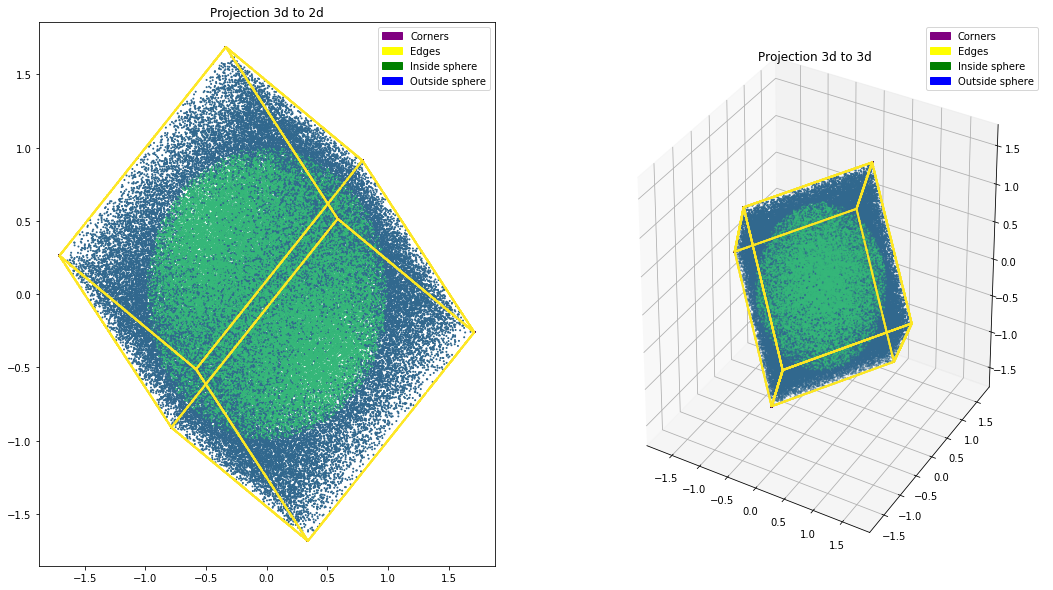

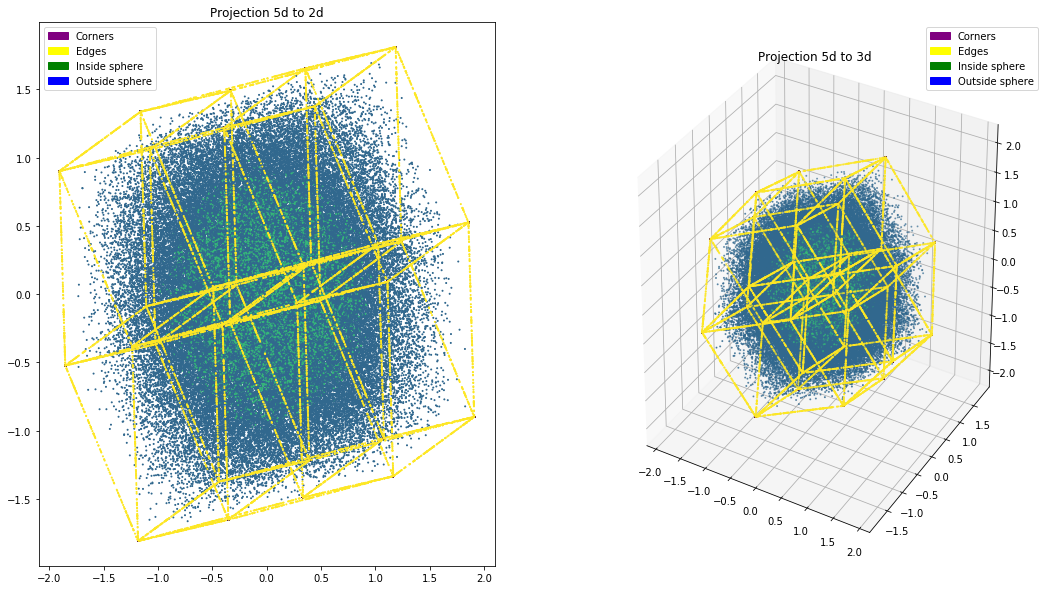

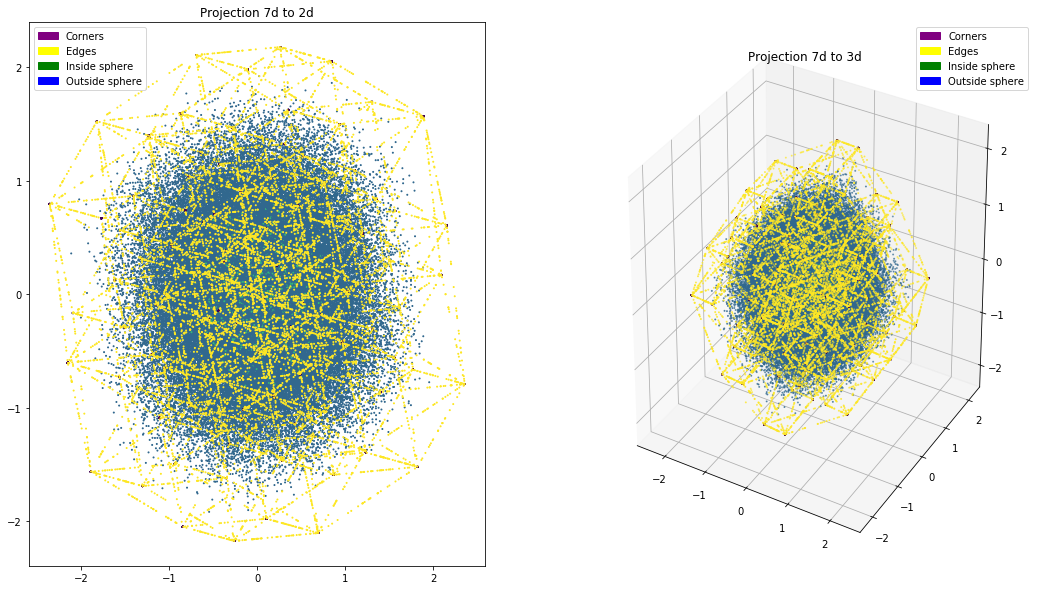

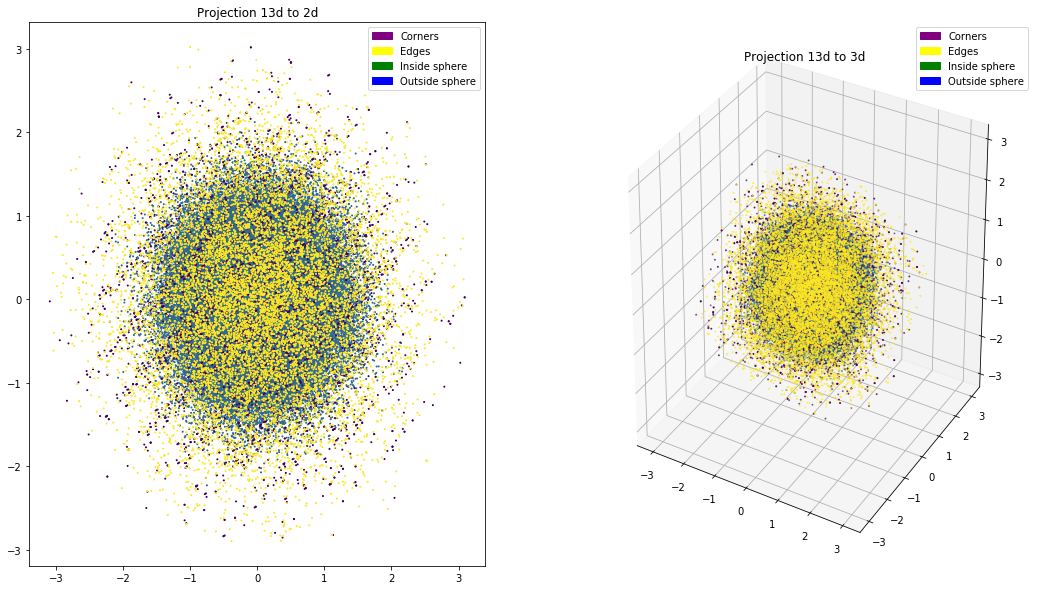

In [2]:
pca_a.plot_ex1_a([3,5,7,13])

# TODO: wnioski

## Zadanie b:
Uzyskałem principal components z użyciem SVD, naniosłem je na obrazek źródłowy, z użyciem PCA z `sklearn` zmapowałem obrazek (wybierając punkty częściowo, per kolor) na 3d:

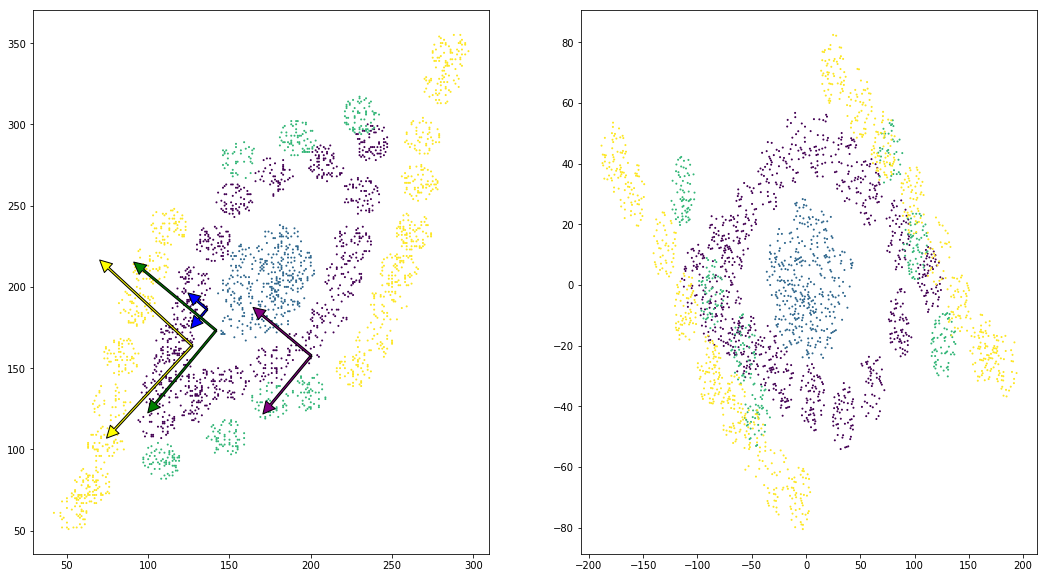

In [3]:
pca_b.ex_b_1()

# TODO - wnioski?

Następnie rzutowałem punkty na 2d zmianiając iloczyn skalarny na inne jądra:
* "cosine" 
    * okazało się , że przy wyśrodkowaniu danych otrzymujemy mniej więcej okrąg.
* "rbf" (radial basis function)
    * okazało się, że dla małych wartości gamma w rbf wyniki są zbliżone do nomralnego pca z ilocznynem skalarnym.

Wyniki:

recentering


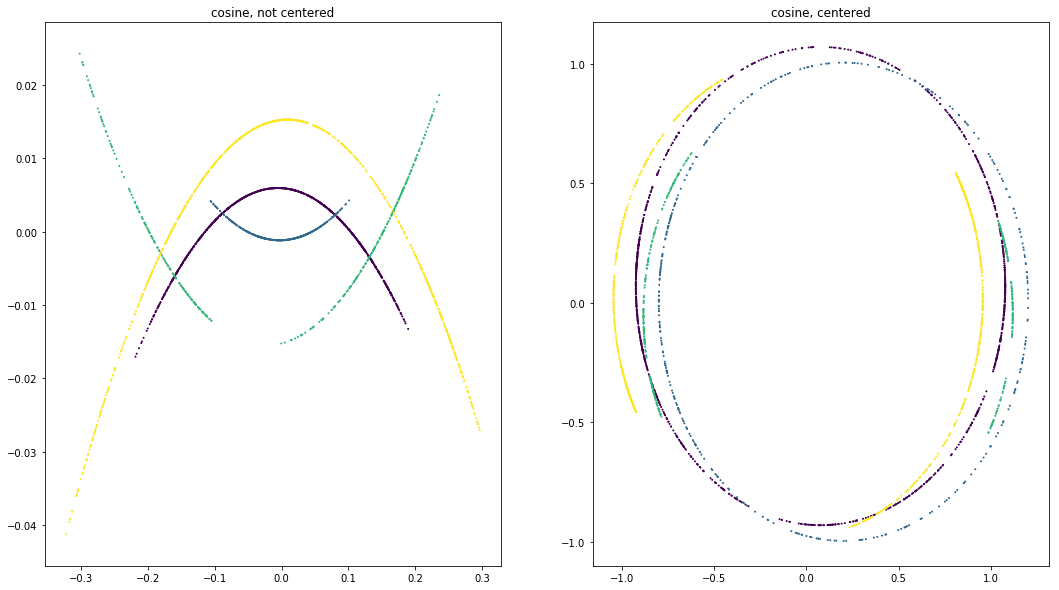

In [2]:
img = img_utils.load_and_preprocess_all(["pca.bmp"])[0]
centered_pca = KernelPCA(n_components=2,kernel='cosine')
centered_pca.recenter_points =True

cos_pcas = {
    KernelPCA(n_components=2,kernel='cosine',gamma=0.00001): "cosine, not centered",
    centered_pca : "cosine, centered"
}


pca_b.ex_b_2_kernel_trick(img,cos_pcas)

rbf_pcas = {
    KernelPCA(n_components=2,kernel='rbf',gamma=0.000001): "rbf, gamma= 0.000001",
    KernelPCA(n_components=2,kernel='rbf',gamma=0.00001): "rbf, gamma= 0.00001",
    KernelPCA(n_components=2,kernel='rbf',gamma=0.00005): "rbf, gamma= 0.00005",
    KernelPCA(n_components=2,kernel='rbf',gamma=0.0001): "rbf, gamma= 0.0001",
    KernelPCA(n_components=2,kernel='rbf',gamma=0.001): "rbf, gamma= 0.001",
    KernelPCA(n_components=2,kernel='rbf',gamma=0.01): "rbf, gamma= 0.01",
    KernelPCA(n_components=2,kernel='rbf',gamma=0.1): "rbf, gamma= 0.1",
    KernelPCA(n_components=2,kernel='rbf',gamma=1): "rbf, gamma= 1",
}


pca_b.ex_b_2_kernel_trick(img,rbf_pcas)